In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.inf)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

dataset=pd.read_csv("mnsit_train.csv")

x = dataset.iloc[:, 1:785].values
y = dataset.iloc[:, 0].values

y_train=np.transpose(to_categorical(y))

y=y[np.newaxis,:]

x_train=x
sc = StandardScaler()  # scaling the data 
x_train = sc.fit_transform(x_train)
x_train=np.transpose(x_train)



test_dataset=pd.read_csv("mnist_test.csv")

a=test_dataset.iloc[:,1:785].values
b=test_dataset.iloc[:,0].values

test_y=np.transpose(to_categorical(b))

test_x=np.transpose(a)

test_labels=b[np.newaxis,:]



Accuracy in epoch 0 is 13.485714285714288 percentage
Accuracy in epoch 1 is 15.878571428571428 percentage
Accuracy in epoch 2 is 17.216666666666665 percentage
Accuracy in epoch 3 is 17.97380952380952 percentage
Accuracy in epoch 4 is 18.50952380952381 percentage
Accuracy in epoch 5 is 18.988095238095237 percentage
Accuracy in epoch 6 is 19.407142857142855 percentage
Accuracy in epoch 7 is 19.823809523809523 percentage
Accuracy in epoch 8 is 20.245238095238093 percentage
Accuracy in epoch 9 is 20.65714285714286 percentage
Accuracy in epoch 10 is 21.076190476190476 percentage
Accuracy in epoch 11 is 21.45952380952381 percentage
Accuracy in epoch 12 is 21.916666666666668 percentage
Accuracy in epoch 13 is 22.380952380952383 percentage
Accuracy in epoch 14 is 22.87142857142857 percentage
Accuracy in epoch 15 is 23.314285714285717 percentage
Accuracy in epoch 16 is 23.788095238095238 percentage
Accuracy in epoch 17 is 24.345238095238095 percentage
Accuracy in epoch 18 is 24.89761904761905 p

<ipython-input-2-fb1f12a46df9>:62: RuntimeWarning: overflow encountered in exp
  y=1/(1+np.exp(-x) )


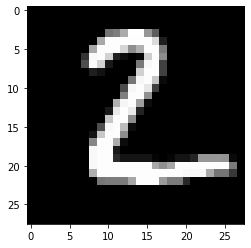

Actually it is 2 predicted is 2


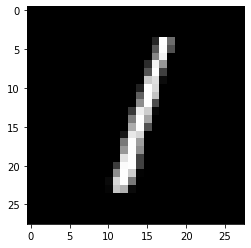

Actually it is 1 predicted is 8


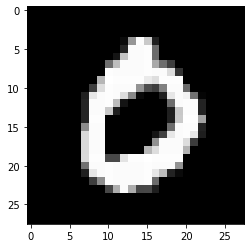

Actually it is 0 predicted is 0


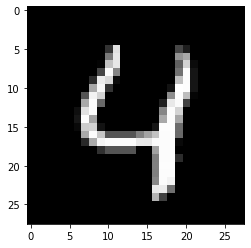

Actually it is 4 predicted is 9


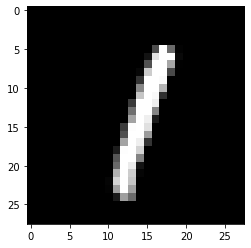

Actually it is 1 predicted is 8


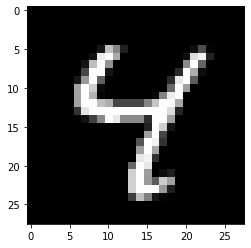

Actually it is 4 predicted is 4


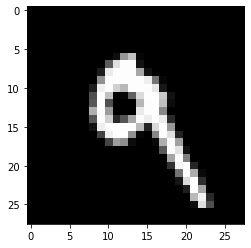

Actually it is 9 predicted is 9


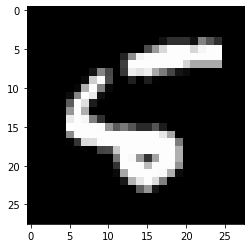

Actually it is 5 predicted is 6


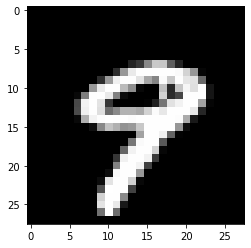

Actually it is 9 predicted is 9


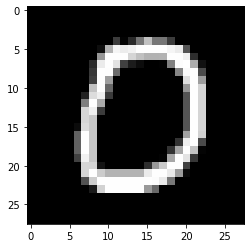

Actually it is 0 predicted is 0


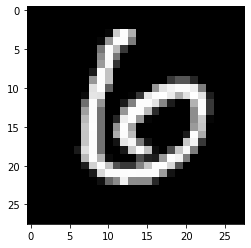

Actually it is 6 predicted is 8


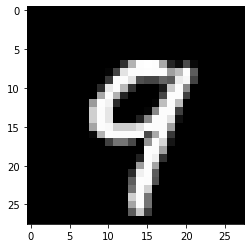

Actually it is 9 predicted is 9


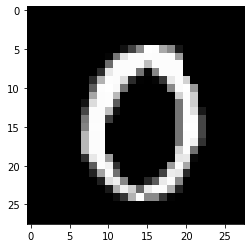

Actually it is 0 predicted is 0


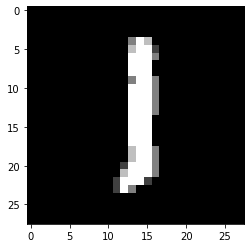

Actually it is 1 predicted is 1


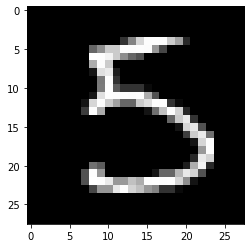

Actually it is 5 predicted is 3


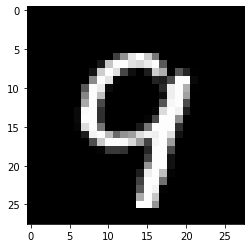

Actually it is 9 predicted is 9


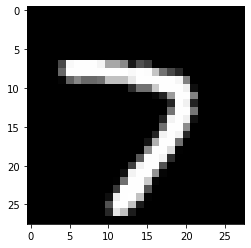

Actually it is 7 predicted is 7


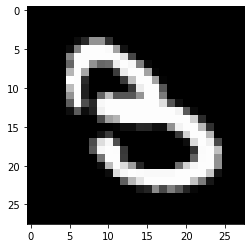

Actually it is 3 predicted is 8


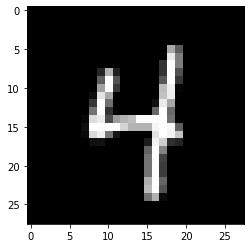

Actually it is 4 predicted is 4


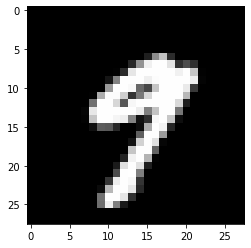

Actually it is 9 predicted is 9


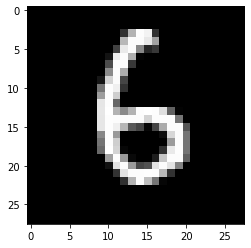

Actually it is 6 predicted is 6


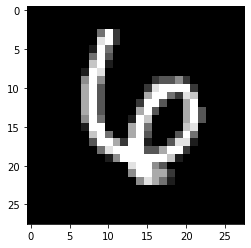

Actually it is 6 predicted is 4


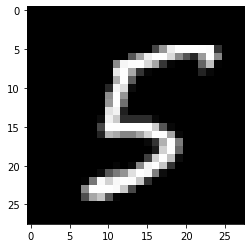

Actually it is 5 predicted is 5


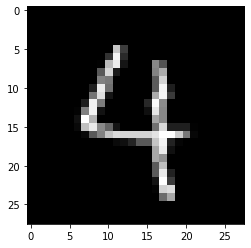

Actually it is 4 predicted is 4


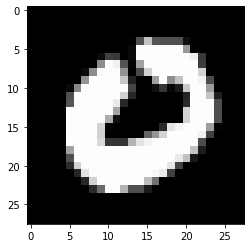

Actually it is 0 predicted is 0


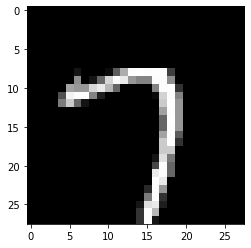

Actually it is 7 predicted is 7


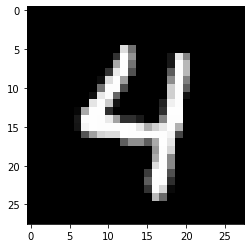

Actually it is 4 predicted is 9


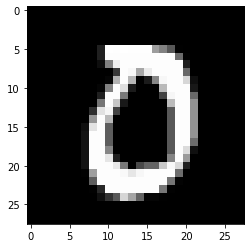

Actually it is 0 predicted is 0


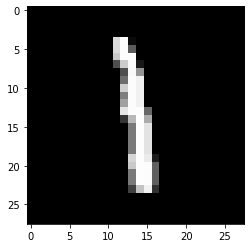

Actually it is 1 predicted is 8


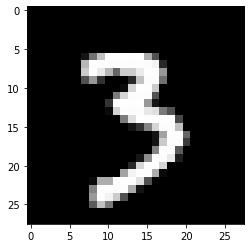

Actually it is 3 predicted is 3


In [2]:
class ann:
    def __init__(self,train,train_result,training_label,test,test_result,testing_label,epoches,alpha,hidden_layers,l):  
        self.train=train
        self.train_result=train_result
        self.training_label=training_label
        self.test=test 
        self.test_result=test_result
        self.testing_label=testing_label
        self.epoches=epoches
        self.alpha=alpha
        self.l=l          # activation function between each rows

        self.input_features=np.shape(train)[0] # along the rows 
        self.output_features = np.shape(train_result)[0]
        self.m=np.shape(train)[1]      # along the columns in a row    

        self.layers=[self.input_features]+hidden_layers+[self.output_features]   # contains number of features in each layer including start , hidden and end layers


        weights=[]     
        bias=[]
         
        
        error_wrt_z=[]
        error_wrt_w=[]
        error_wrt_b=[]

        for i in range(len(self.layers)-1): 
            a=np.random.rand (self.layers[i+1],self.layers[i])-0.5
            weights.append(a)

            b=np.random.rand(self.layers[i+1],1)-0.5          # will use broad casting                                              
            bias.append(b) 

            error_wrt_w.append(i)    # how many dw and db will be there , later i's will be updated with dw and db matrices 

            error_wrt_b.append(i)      # there will be number of (layers - 1) matrices for weights,bias,error wrt w,b,z in each forward propagation   

            error_wrt_z.append(i)  
        
        self.weights=weights
        self.bias=bias

       
        self.error_wrt_z= error_wrt_z
        self.error_wrt_w= error_wrt_w
        self.error_wrt_b= error_wrt_b

        self.activations=[]
        self.z=[]

        self.function_derivitive=[self.reluDerivative,self.sigmoid_derivative]  # in middle layers put relu or sigmoid only you cannnot put softmax in middle as you dont know d softmax(z) / d(z)
        self.function=[self.relu,self.sigmoid,self.softmax]  



    def relu(self,x):
        return np.maximum(0.0, x)


    def sigmoid(self , x):
        y=1/(1+np.exp(-x) )                       
        return y
        
    def sigmoid_derivative(self, x):        #  d sigma(z) / d(z) = sigma(z)*(1-sigma(z)) 
        return np.multiply(x,(1-x))         # in this we are finding for all the a's of the matrix 

    def reluDerivative(self,x):
        y=np.copy(x)
        y[y<=0] = 0
        y[y>0] = 1
        return y     

    def softmax (self,x):
        e=np.exp(x)
        return e/(np.sum(e,axis=0))  


    def forward_propogate(self,data): # we are using forward prop on training as well as testing data so 
        self.activations.clear()   #  with each epoch our w will be updated as dw db dz will be updated so we will be getting new activations as well as z  after each eppoch
        self.z.clear()
        self.z.append(data)
        self.activations.append(data)        ### note z and a will contain all the layers from  1st given layer at indeex 0 to the last output predicted layer 
      
        for i in range (len(self.layers)-1):
            self.z.append(np.add (np.dot(self.weights[i],self.activations[i]) ,self.bias[i]))
        
           # self.z.append(np.add( np.dot( self.weights[i],self.activations[i] ) ,np.repeat(self.bias[i],self.m,axis=1)) )    
            self.activations.append(self.function[self.l[i]](self.z[i+1]  ) )  



    def backward_propogation(self):  # we dont know d softmax(z) / d (z) so we are not using dz formula for last layer 
        self.error_wrt_z[len(self.layers)-2]=np.subtract(self.activations[len(self.layers)-1] , self.train_result )
        for i in reversed(range(len(self.layers) - 1)):
            self.error_wrt_w[i] = 1/self.m*(np.dot((self.error_wrt_z[i]),np.transpose(self.activations[i])))  
            
            self.error_wrt_b[i]=1/self.m *(np.sum(self.error_wrt_z[i] , axis=1 , keepdims=True))

            if i>=1:
                    self.error_wrt_z[i-1]=np.multiply (  np.dot ( np.transpose (self.weights[i]) , self.error_wrt_z[i] )  , self.function_derivitive[ self.l[i-1] ] ( self.function[ self.l[i-1] ]   (self.z[i]) ) )
            else:
                continue

    def training(self):
        for i in range(self.epoches):
            self.forward_propogate(data=self.train)
            final_prediction=self.predict()
            accuracy_percentage=self.accuracy(final_prediction,actual_result=self.training_label)
            print("Accuracy in epoch {} is {} percentage".format(i,accuracy_percentage))
            self.backward_propogation()
            for j in range(len (self.layers)-1):
                self.weights[j]=np.subtract(self.weights[j],self.alpha*self.error_wrt_w[j])
                
                self.bias[j]=np.subtract(self.bias[j],self.alpha*self.error_wrt_b[j])
    
     
    def predict(self):                   
        return (np.argmax(self.activations[-1], axis=0)[np.newaxis,:])        
     
    def accuracy(self,final_prediction,actual_result):
        accuracy_per = (np.sum(actual_result ==final_prediction) / (actual_result).shape[1] ) * 100
        return accuracy_per

    def testing(self):
      self.forward_propogate(data=self.test)
      final_prediction=self.predict()  # now activation layers are for testing data after running this function so we are predicting on testing data only
      accuracy_perct=self.accuracy(final_prediction=final_prediction,actual_result=self.testing_label)
      
      return  accuracy_perct,final_prediction

    def draw(self,indexes,a):    # Run after running testing so you have the predictions saved for your testing data  ****its only for testing data ****
      for i in range (indexes):
        pixel=a[i,np.newaxis].reshape((28,28))
        plt.gray()
        plt.imshow(pixel, interpolation='nearest')
        plt.show()

        label=self.testing_label[0,i]
        prediction=self.testing()[1][0,i]

        print("Actually it is {} predicted is {}".format(label,prediction))

        


model=ann(train=x_train,train_result=y_train,training_label=y,test=test_x,test_result=test_y,testing_label=test_labels,epoches=800,alpha=0.3,hidden_layers=[50,20,10],l=[0,1,0,2])
model.training()

test_accuracy=model.testing()[0]
print("test accuracy is {} ".format(test_accuracy))

model.draw(indexes=30,a=a)



